## BSM VS Binomial Pricing, how they converge in the limit

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
sigma = 0.2   # Volatility
r = 0.05      # Risk-free rate
T = 1         # Time to maturity (1 year)

# For 1-step, calibrate u and d to match volatility
dt = T / 1
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

# Risk-neutral probability
p = (np.exp(r * dt) - d) / (u - d)

# Payoffs at maturity
Su = S0 * u
Sd = S0 * d
Cu = max(Su - K, 0)
Cd = max(Sd - K, 0)

# Present value of expected payoff
C0 = np.exp(-r * T) * (p * Cu + (1 - p) * Cd)

print(f"1-Step Binomial Call Option Price: {C0:.2f}")

1-Step Binomial Call Option Price: 12.16


## also follows risk neutral fram work of 1+r - d / u - d

no arbitrage, frictionless markets, discrete steps, constant volatility.

In [2]:
def binomial_call_option(S0, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Stock prices at maturity
    ST = np.array([S0 * (u**j) * (d**(N - j)) for j in range(N + 1)])
    
    # Option values at maturity
    C = np.maximum(ST - K, 0)
    
    # Backward induction
    for i in range(N - 1, -1, -1):
        C = np.exp(-r * dt) * (p * C[1:i+2] + (1 - p) * C[0:i+1])
    
    return C[0]

# Example with 5 steps
binom_price = binomial_call_option(S0=100, K=100, T=1, r=0.05, sigma=0.2, N=5)
print(f"5-Step Binomial Call Price: {binom_price:.2f}")

5-Step Binomial Call Price: 10.81


Binomial converges to Black-Scholes as N → ∞

In [3]:
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call

# Example Black-Scholes price
bs_price = black_scholes_call(S=100, K=100, T=1, r=0.05, sigma=0.2)
print(f"Black-Scholes Call Price: {bs_price:.2f}")

Black-Scholes Call Price: 10.45


assumptions of Black-Scholes: continuous trading, lognormal distribution, constant volatility, no dividends, no transaction costs.

In [4]:
prices = []

for N in [1, 5, 25, 100, 500]:
    price = binomial_call_option(S0=100, K=100, T=1, r=0.05, sigma=0.2, N=N)
    prices.append((N, price))

bs = black_scholes_call(100, 100, 1, 0.05, sigma=0.2)

comparison_df = pd.DataFrame(prices, columns=["Steps", "Binomial Price"])
comparison_df["Black-Scholes Price"] = bs
comparison_df

,Steps,Binomial Price,Black-Scholes Price
0,1,12.162285,10.450584
1,5,10.805934,10.450584
2,25,10.520966,10.450584
3,100,10.430612,10.450584
4,500,10.446585,10.450584


now watch! binomial prices converge to BS price as steps increase.

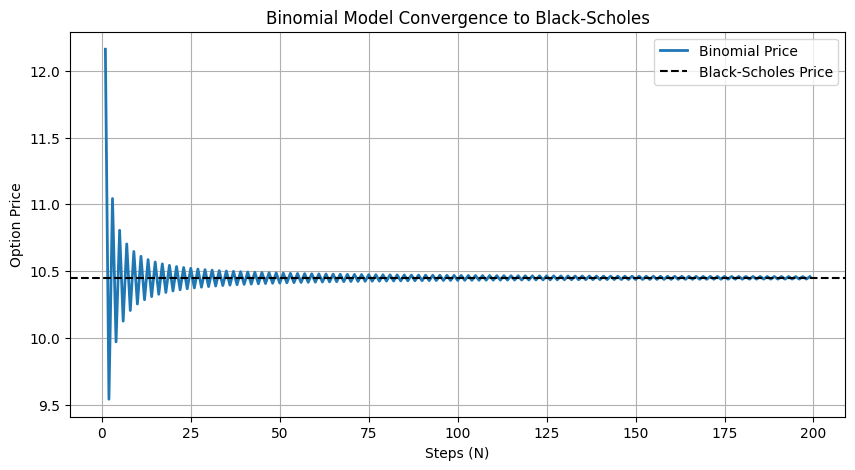

In [5]:
Ns = np.arange(1, 200)
bin_prices = [binomial_call_option(100, 100, 1, 0.05, 0.2, N) for N in Ns]
bs_price = black_scholes_call(100, 100, 1, 0.05, 0.2)

plt.figure(figsize=(10, 5))
plt.plot(Ns, bin_prices, label="Binomial Price", lw=2)
plt.axhline(bs_price, color='black', linestyle='--', label="Black-Scholes Price")
plt.xlabel("Steps (N)")
plt.ylabel("Option Price")
plt.title("Binomial Model Convergence to Black-Scholes")
plt.legend()
plt.grid(True)
plt.show()

Even though both models hold steadfast in the assumption of constant volatility, we observe the shift from "Discrete Price Steps/Paths" to a more closed form continuous model with the BSM model. By calibrating u = exp(σ√dt) and d = 1/u, the binomial tree's implied volatility matches σ at every step count, and the discrete model correctly converges to the continuous Black-Scholes price as N → ∞.